# Clustering Assignment WiSe2024

### Bachelor programme AAI-B3
### Module: Unsupervised and Reinforcement Learning
### TH Rosenheim




## Context

The dataset provided represents _customer transaction data_ for an e-commerce platform. Each row contains details about an individual customer’s purchasing behavior and demographics, while each column represents a different feature of that behavior or characteristic. 

Columns are:

- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)


The goal is to segment the customers into distinct groups based on their data. These segments can help the e-commerce platform better understand their customers, enabling targeted marketing strategies, personalized recommendations, and improved customer satisfaction.

**Assignment: Clustering Analysis with K-Means, Agglomerative Clustering, and DBSCAN**

# 1.Imports and Setup

In [12]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import warnings

warnings.filterwarnings('ignore')

## 2. Load Dataset

In [13]:
df = pd.read_csv('./customers.csv')
df.head()

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      219 non-null    int64  
 1   Gender          217 non-null    object 
 2   Age             216 non-null    float64
 3   Annual_Income   218 non-null    float64
 4   Spending_Score  218 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.7+ KB


,CustomerID,Age,Annual_Income,Spending_Score
count,219.000000,216.000000,218.000000,218.000000
mean,110.000000,38.157407,62.628440,50.252294
std,63.364028,13.797312,27.804527,25.752735
min,1.000000,18.000000,15.000000,1.000000
25%,55.500000,28.000000,42.000000,34.250000
50%,110.000000,35.000000,62.000000,50.000000
75%,164.500000,48.000000,78.000000,72.750000
max,219.000000,70.000000,141.000000,99.000000


In [14]:
print(df.isnull().sum())

df = df.dropna() 

CustomerID        0
Gender            2
Age               3
Annual_Income     1
Spending_Score    1
dtype: int64


## 3. Data Cleaning

In [1]:
df = df.dropna()

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Annual_Income', 'Spending_Score']])
plt.title('Boxplot for Outlier Detection')
plt.show()


NameError: name 'df' is not defined

## 4. Normalization

In [16]:
scaler = StandardScaler()
df[['Age', 'Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Age', 'Annual_Income', 'Spending_Score']])

## 5. K-Means Clustering

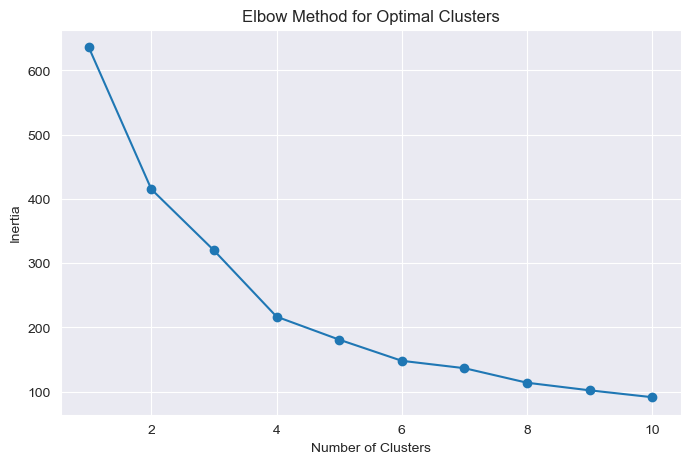

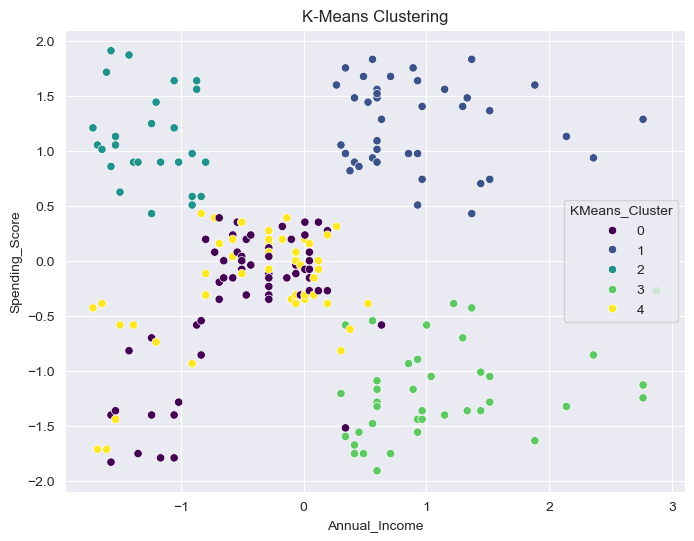

In [17]:
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df[['Age', 'Annual_Income', 'Spending_Score']])
    inertia.append(model.inertia_)
    

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Age', 'Annual_Income', 'Spending_Score']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

## 6. Agglomerative Clustering

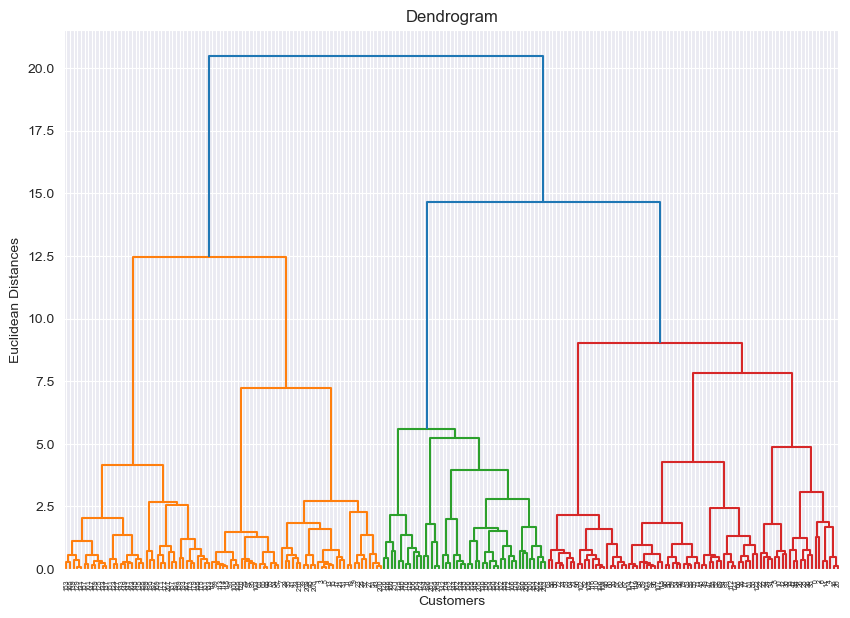

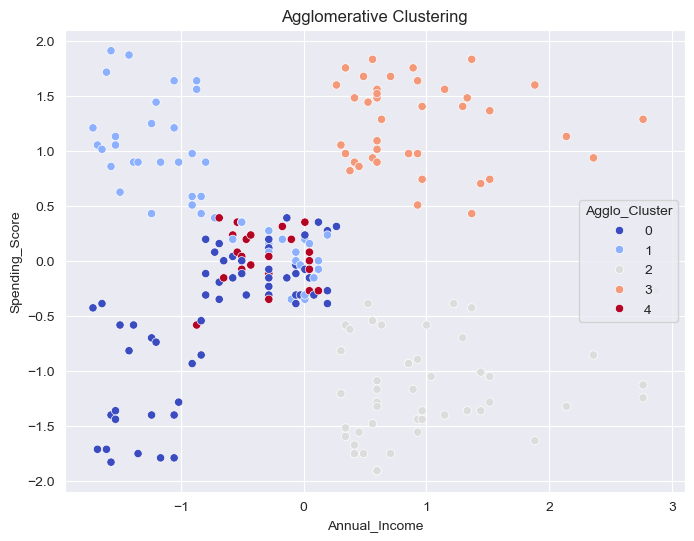

In [18]:
from sklearn.cluster import AgglomerativeClustering
from plotly.figure_factory._dendrogram import sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df[['Age', 'Annual_Income', 'Spending_Score']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(df[['Age', 'Annual_Income', 'Spending_Score']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Agglo_Cluster', data=df, palette='coolwarm')
plt.title('Agglomerative Clustering')
plt.show()

## 7. DBSCAN

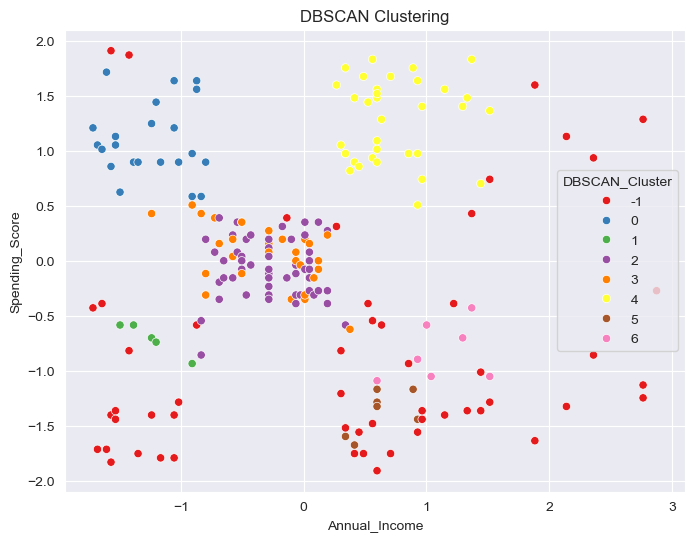

DBSCAN - Number of clusters: 7
DBSCAN - Number of noise points: 55


In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[['Age', 'Annual_Income', 'Spending_Score']])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='DBSCAN_Cluster', data=df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df[['Age', 'Annual_Income', 'Spending_Score']])

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"DBSCAN - Number of clusters: {n_clusters}")
print(f"DBSCAN - Number of noise points: {n_noise}")


## 8. Comparison and Evaluation

In [21]:
from sklearn.metrics import silhouette_score

print('K-Means Silhouette Score:', silhouette_score(df[['Age', 'Annual_Income', 'Spending_Score']], df['KMeans_Cluster']))
print('Agglomerative Silhouette Score:', silhouette_score(df[['Age', 'Annual_Income', 'Spending_Score']], df['Agglo_Cluster']))


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df[['Age', 'Annual_Income', 'Spending_Score']])

if n_clusters > 1: 
    filtered_labels = labels[labels != -1]  
    filtered_data = df[['Age', 'Annual_Income', 'Spending_Score']][labels != -1]
    silhouette = silhouette_score(filtered_data, filtered_labels)
    print(f'DBSCAN - Silhouette Score: {silhouette:.3f}')
else:
    print('DBSCAN - Silhouette Score cannot be computed as there is only one cluster.')


K-Means Silhouette Score: 0.39721451655614803
Agglomerative Silhouette Score: 0.341487741515647
DBSCAN - Silhouette Score: 0.436


## 9. Summary


### K-Means Clustering
- Successfully created well-separated clusters based on Elbow Method and Silhouette Scores.  
- The optimal number of clusters was determined to be **5**, providing meaningful segmentation of customers.  
- Visualizations showed distinct groups, making K-Means effective for customer segmentation.  

### Agglomerative Clustering
- Hierarchical clustering revealed potential patterns through dendrograms.  
- Suggested **3-4 clusters** as optimal, indicating flexibility for hierarchical grouping.  
- Suitable for scenarios where hierarchical relationships among data points are important.  

### DBSCAN Clustering
- Detected noise points and outliers effectively, demonstrating its usefulness for anomaly detection.  
- Cluster density was highly sensitive to parameter tuning (**eps** and **min_samples**), requiring empirical adjustments.  
- Struggled to form distinct clusters compared to K-Means and Agglomerative Clustering.  

---

### Key Observations
- High spenders with moderate income formed a distinct cluster, highlighting potential targets for premium marketing.  
- Younger customers generally had higher spending scores, indicating opportunities for tailored marketing campaigns.  
- DBSCAN’s ability to detect outliers can help flag unusual spending patterns or anomalies